In [1]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util


TensorFlow version: 2.15.0


In [2]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [3]:
model = MultiPoleModel(moments=3, lrate=0.9, optimizer='adadelta', loss='mae', scale=1e9, early_stop=False, target_stop=2)
test_epochs = 2000

In [4]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 125.7241
epoch  1 --- Loss --- 118.27084
epoch  2 --- Loss --- 111.75803
epoch  3 --- Loss --- 105.747765
epoch  4 --- Loss --- 100.05916
epoch  5 --- Loss --- 94.707375
epoch  6 --- Loss --- 90.02167
epoch  7 --- Loss --- 85.49639
epoch  8 --- Loss --- 81.10646
epoch  9 --- Loss --- 76.97335
epoch  10 --- Loss --- 72.984604
epoch  11 --- Loss --- 69.05785
epoch  12 --- Loss --- 65.25858
epoch  13 --- Loss --- 61.701263
epoch  14 --- Loss --- 58.195015
epoch  15 --- Loss --- 55.017685
epoch  16 --- Loss --- 52.14024
epoch  17 --- Loss --- 49.359177
epoch  18 --- Loss --- 46.70684
epoch  19 --- Loss --- 44.289024
epoch  20 --- Loss --- 42.287598
epoch  21 --- Loss --- 40.683537
epoch  22 --- Loss --- 39.085766
epoch  23 --- Loss --- 37.634987
epoch  24 --- Loss --- 36.686752
epoch  25 --- Loss --- 36.10171
epoch  26 --- Loss --- 35.5641
epoch  27 --- Loss --- 35.010433
epoch  28 --- Loss --- 34.53308
epoch  29 --- Loss --- 34.102417
epoch  30 --- Loss --- 33.72005


In [5]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 30.267037014166515 minutes


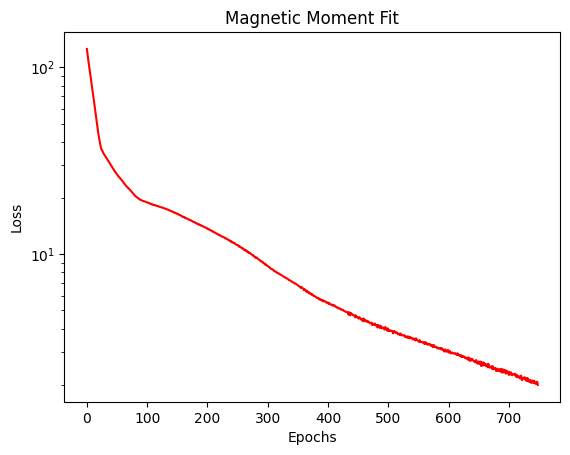

In [6]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [7]:
model.moment()

---- Moment  0 -----
Position:  [[ 0.5088103  -0.02141795 -0.01504047]]
Value:     [[0.9063595  0.11853832 0.08727895]]
---- Moment  1 -----
Position:  [[-0.02338102 -0.02302334  0.15145612]]
Value:     [[0.16007558 0.2404789  2.665049  ]]
---- Moment  2 -----
Position:  [[-0.00571585  0.28440496 -0.02224746]]
Value:     [[-0.0622687  1.5989563  0.2255873]]
